In [4]:
import pandas as pd

df = pd.read_csv("global_inflation_countries.csv")  
df.head()


,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,inflation_rate
0,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1960,0.0
1,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1961,0.0
2,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1962,0.0
3,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1963,0.0
4,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1964,0.0


In [5]:
df["year"] = pd.to_datetime(df["year"], format='%Y')   # Convert the 'year' column to datetime format  

In [8]:
print(df.columns)

Index(['country_code', 'country_name', 'region', 'sub_region', 'year',
       'inflation_rate'],
      dtype='object')


In [9]:
df.dtypes

country_code              object
country_name              object
region                    object
sub_region                object
year              datetime64[ns]
inflation_rate           float64
dtype: object

In [10]:
print(df.isnull().sum())

country_code         0
country_name         0
region            5440
sub_region           0
year                 0
inflation_rate       0
dtype: int64


In [11]:
# Fill missing values in 'region' column with the mode of the 'sub_region' column
df["region"] = df.groupby("sub_region")["region"].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [12]:
print(df.isnull().sum())

country_code         0
country_name         0
region            1728
sub_region           0
year                 0
inflation_rate       0
dtype: int64


In [13]:
missing_regions = df[df["region"].isnull()]["sub_region"].unique()
print("Sub-regions with missing regions:", missing_regions)


Sub-regions with missing regions: ['WESTERN EUROPE' 'AUSTRALIA AND NEW ZEALAND' 'NORTHERN AMERICA'
 'NORTHERN EUROPE']


In [14]:
sub_region_to_region = {
    "WESTERN EUROPE": "EUROPE",
    "AUSTRALIA AND NEW ZEALAND": "OCEANIA",
    "NORTHERN AMERICA": "AMERICAS",
    "NORTHERN EUROPE": "EUROPE"
}
df["region"] = df["region"].fillna(df["sub_region"].map(sub_region_to_region))


In [15]:
print(df.isnull().sum())

country_code      0
country_name      0
region            0
sub_region        0
year              0
inflation_rate    0
dtype: int64


In [16]:
print(f"Duplicate rows: {df.duplicated().sum()}")  # Count duplicate rows


Duplicate rows: 0


In [17]:

# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [19]:
categorical_cols = [
    "country_code", "country_name", "region", "sub_region", 
     
]

df[categorical_cols] = df[categorical_cols].astype(str)  # Ensure all are strings

# Remove extra spaces and standardize case
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.title())
#Ensure all values are stored as strings
#Remove extra spaces
#Convert to Title Case (e.g., "afghanistan" → "Afghanistan")

In [20]:
df["country_name"] = df["country_name"].str.title().str.strip()  # Capitalize & remove spaces
df["region"] = df["region"].str.upper()  # Convert to uppercase for uniformity
df["sub_region"] = df["sub_region"].str.title().str.strip()  # Capitalize & remove spaces



In [23]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['inflation_rate'].quantile(0.25)
Q3 = df['inflation_rate'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['inflation_rate'] < lower_bound) | (df['inflation_rate'] > upper_bound)]

# Display the outliers
print("\nOutliers in the 'inflation_rate' column:")
outliers


Outliers in the 'inflation_rate' column:


,country_code,country_name,region,sub_region,year,inflation_rate
48,Afg,Afganistan,ASIA MERIDIONAL,Southern Asia,2008-01-01,26.418664
96,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,1992-01-01,226.005421
97,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,1993-01-01,85.004751
98,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,1994-01-01,22.565053
101,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,1997-01-01,33.180274
...,...,...,...,...,...,...
13693,Zmb,Zambia,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,2021-01-01,22.020768
13755,Zwe,Zimbabwe,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,2019-01-01,255.304991
13756,Zwe,Zimbabwe,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,2020-01-01,557.201817
13757,Zwe,Zimbabwe,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,2021-01-01,98.546105


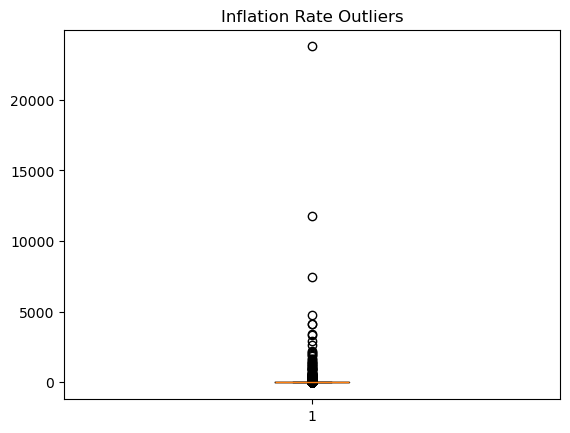

In [24]:
#to detect outliers in the 'inflation_rate' column
import matplotlib.pyplot as plt

plt.boxplot(df["inflation_rate"].dropna())  # Box plot to detect outliers
plt.title("Inflation Rate Outliers")
plt.show()
